In [1]:
import numpy as np
import random

#strike
K = 99

#Volatility
vol = 0.20

#Stock Price t=0
s_0 = 100

#Interest rate
r = 0.06

#Time to maturity is one year
T = 1

In [2]:
#Final price of stock
def fin_stock_price(s_0, power, dt):
    return s_0*(np.exp(vol*np.sqrt(dt))**(power))

#Price of option at expiration
def expiration_option_price(K, s_T):
    return max(0, s_T - K)

def fair_value(r, dt, p, prev_fair_val_1, prev_fair_val_2):
    return np.exp(-r*dt)*(p*(prev_fair_val_1) + (1 - p)*prev_fair_val_2)

In [11]:
row_list = []

def calculate_prev_row(dt,p):
    row_values = []
    #print(len(row_list))
    prev_row_values = row_list[len(row_list) - 1]
    #print(len(prev_row_values))
    for i in range(len(prev_row_values) -1):
        #print(i)
        fv = fair_value(r, dt, p, prev_row_values[i], prev_row_values[i+1])
        row_values.append(fv)
    row_list.append(row_values)

    
def option_pricer(steps):
    dt = T/steps
    up_val = np.exp(vol*np.sqrt(dt))
    down_val = np.exp(-vol*np.sqrt(dt))
    p = (np.exp(r*dt) - down_val)/(up_val - down_val)
    #row_list = []
    leaf_nodes = []
    for i in range(steps, -steps-1, -2):
        s_T = fin_stock_price(s_0, i, dt)
        end_option_price = expiration_option_price(K, s_T)
        leaf_nodes.append(end_option_price)
    row_list.append(leaf_nodes)
    #print(leaf_nodes)




    for i in range(steps):
        calculate_prev_row(dt,p)
    return row_list[-1][0]
    
option_pricer(500)

volatilities = [i for i in np.arange(0.005,0.3,0.001)]
tree_prices = []

for vola in volatilities:
    vol = vola
    tree_prices.append(option_pricer(500))

### Black Scholes

In [12]:
#importing
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

#stock
#current price
S = 100
#Strike price
K = 99

#interest
r = 0.06

#volatility 
sigma = 0.20

#time to maturity (in years)
T = 1


#pay-off at maturity
#max(S(T) - K, 0)

#defining d1 and d2
def d1(S,K,T,r,sigma):
    return(np.log(S/K)+(r+sigma**2/2)*T)/sigma*np.sqrt(T)
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*np.sqrt(T)

#Black-Scholes
def Call(S, K, T, r, sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*np.exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))


#hedge parameter
delta_t = norm.cdf(d1(S,K,T,r,sigma))


print("d1 = " , d1(S,K,T,r,sigma))
print("d2 = ", d2(S,K,T,r,sigma))
print("option price = ", Call(S, K, T, r, sigma))
print("hedge parameter = ", delta_t)

black_prices = []

for vola in volatilities:
    sigma = vola
    black_prices.append(Call(S,K,T,r,sigma))

d1 =  0.4502516792675075
d2 =  0.25025167926750747
option price =  11.544280227051097
hedge parameter =  0.6737355117348961


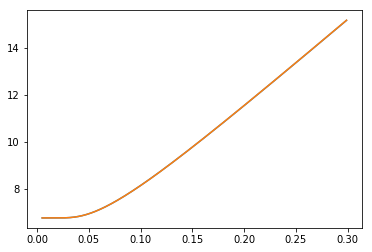

In [13]:
import matplotlib.pyplot as plt

#print(tree_prices)
#print(black_prices)

plt.figure()
plt.plot(volatilities,black_prices)
plt.plot(volatilities,tree_prices)
plt.show()